In [1]:
from collections import defaultdict
import sys; sys.path.append('..')

from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from web_server import RecommendWebServer
from policy import MFThompsonSampling

In [5]:
# 実験設定
## アクション数
n_action=10

## ユーザー数
n_user=3

## ラウンド回数
T=1000

## シミュレーション回数
n_sim=50

## アクション, ユーザーEmbeddingの次元
dim_context=10

## 真の報酬モデルの誤差項の分散
noise_ver=1.

## ユーザーEmbeddingの事前分布の分散
noise_u_ver=1.

## アクションEmbeddingの事前分布の分散
noise_a_ver=1.

## 推定量の更新バッチ数
batch_size=1

## 報酬のタイプ
reward_type="continuous"

## 時刻ごとにサイトに訪れたユーザーリクエストに応じて、アクションをレスポンスして報酬を受け取るwebサーバー
web_server = RecommendWebServer(
    n_action=n_action,
    n_user=n_user,
    dim_context=dim_context,
    reward_type=reward_type,
    noise_ver=noise_ver,
)

In [6]:
results = defaultdict(lambda: defaultdict(list))

for _ in tqdm(range(n_sim)):
    # MF TS
    model = MFThompsonSampling(
        T=T,
        n_action=n_action,
        n_user=n_user,
        dim_context=dim_context,
        noise_ver=noise_ver,
        noise_u_ver=noise_u_ver,
        noise_a_ver=noise_a_ver,
        batch_size=batch_size
    )
    metrics = model.run(web_server)
    
    model_name = "LinTS"
    for metric_name, metric_values in metrics.items():
        results[model_name][metric_name].append(metric_values)


mean_results = defaultdict(dict)
for policy_name, metrics in results.items():
    for metric_name, metric_values in metrics.items():
        mean_results[metric_name][policy_name] = np.array(metric_values).mean(0)

100% 50/50 [00:26<00:00,  1.86it/s]


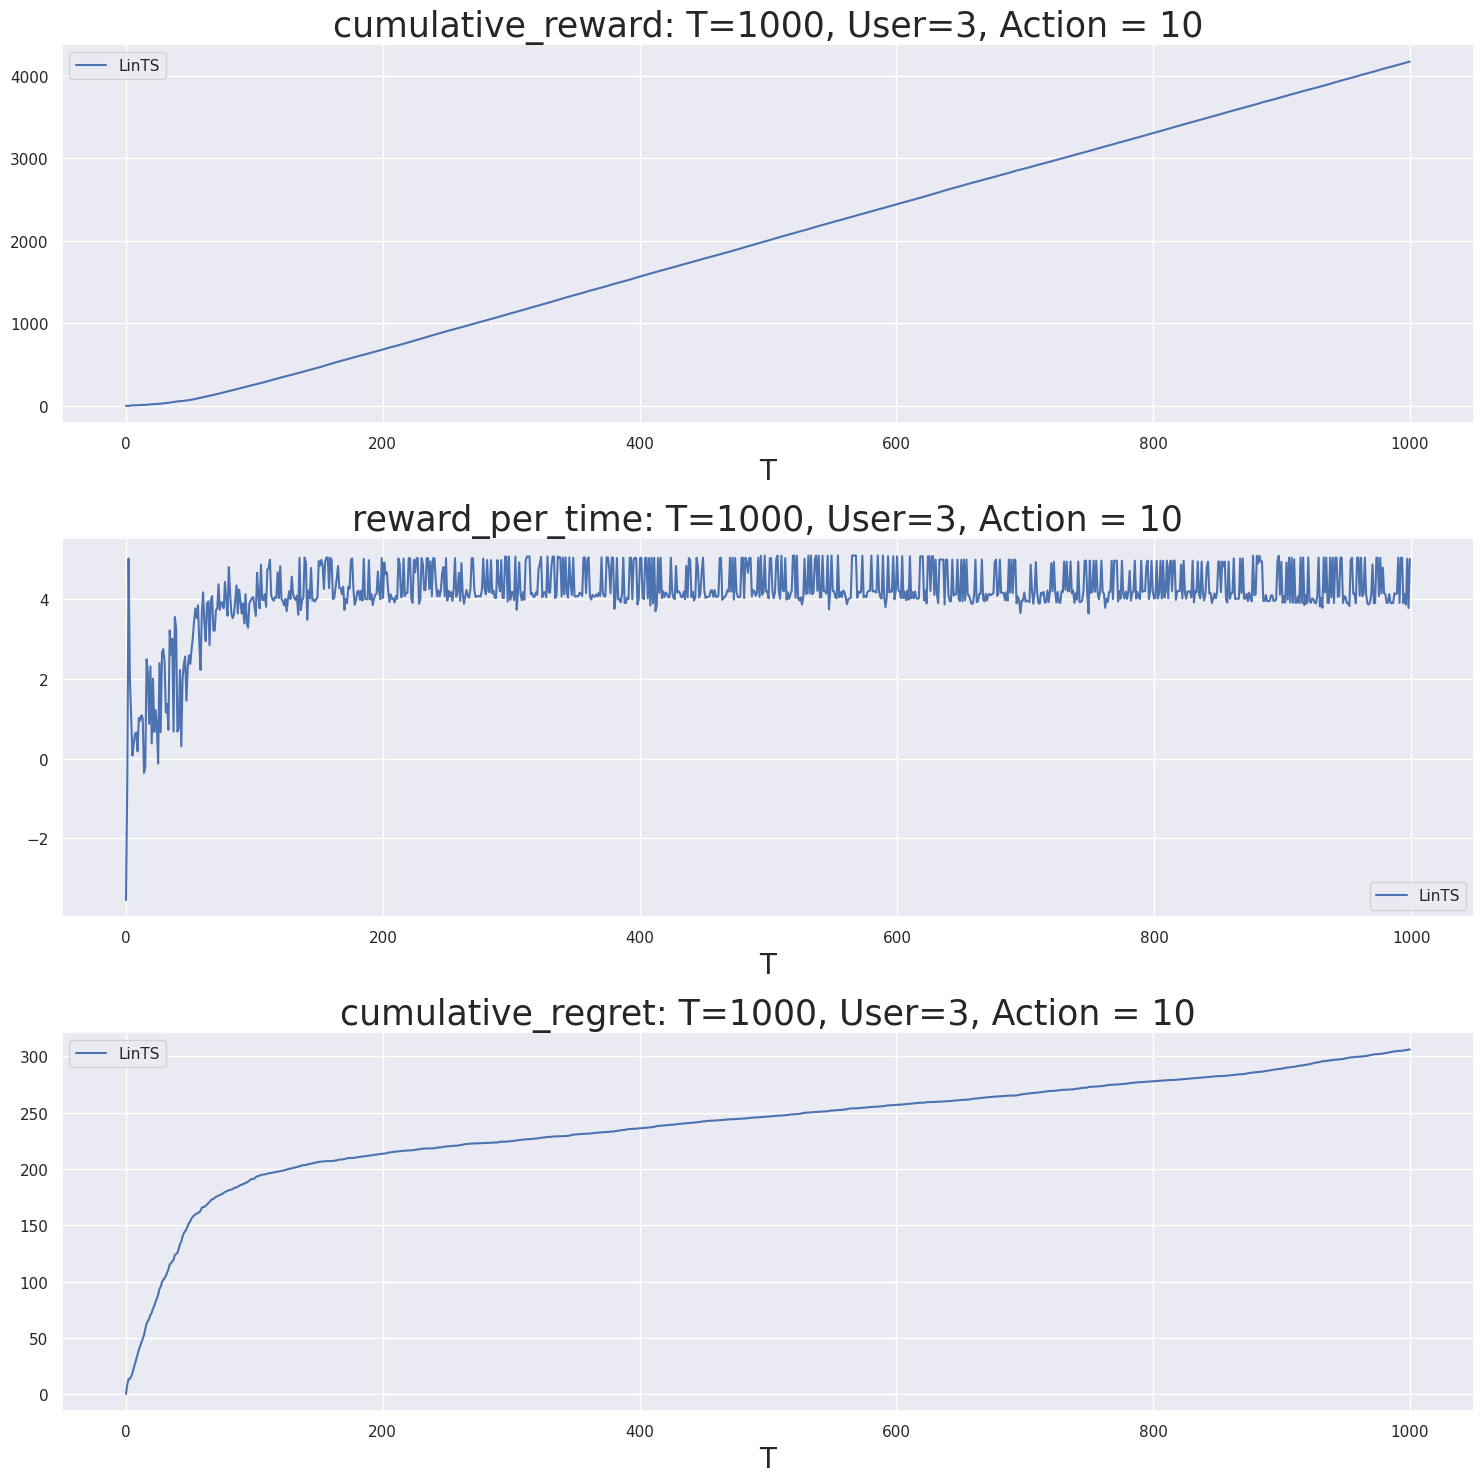

In [7]:
# plot
plt.figure(figsize=(15,15))

for index, metric_name in enumerate(mean_results):
    plt.subplot(3, 1, index + 1)
    plt.title(f'{metric_name}: T={T}, User={n_user}, Action = {n_action}', fontsize=25)
    
    for policy_name, metric_values in mean_results[metric_name].items():
        plt.plot(metric_values, label=policy_name)
        
    plt.xlabel('T', fontsize=20)
    plt.legend()
    plt.tight_layout()

        
plt.show()

In [15]:
from obp.dataset import linear_behavior_policy

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [22]:
u = np.random.uniform(1, 3, size=(1, 5))
a = np.random.uniform(1, 3, size=(1, 5))

In [24]:
linear_behavior_policy(
    context=u,
    action_context=a,
)

/usr/local/lib/python3.9/site-packages/obp/dataset/synthetic.py:996: RuntimeWarning: invalid value encountered in divide
  pi_b_logits = degree * (pi_b_logits - pi_b_logits.mean()) / pi_b_logits.std()


array([[nan]])